# Helsinki City Bikes EDA

#### Author: Kelvin Purdom

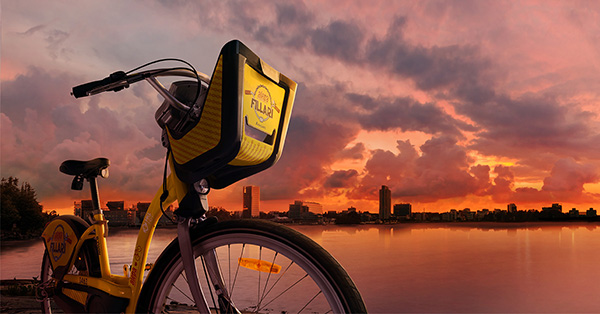

In [1]:
from IPython.display import display, Image
display(Image(filename='hsl_pyoraily_pieni.jpeg'))

An exploration of the Kaggle Helsinki City Bikes database to extract meaningful data on Rides per Hour, departure locations, Ride distances, map locations ect.

https://www.kaggle.com/datasets/geometrein/helsinki-city-bikes


#### Importing modules and database

In [4]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv 


In [2]:
#import dataframe to pandas
dataframe = pd.read_csv("../raw_data/database.csv", low_memory=False)

In [5]:
#EDA using Autoviz
sweet_report = sv.analyze(dataframe)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


In [6]:
#Saving results to HTML file
sweet_report.show_html('sweet_report.html')

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
#copy database
df = dataframe.copy()

In [5]:
df.isna().sum()

departure                     0
return                        0
departure_id                  0
departure_name                0
return_id                     0
return_name                   0
distance (m)                  0
duration (sec.)               0
avg_speed (km/h)           3550
departure_latitude            0
departure_longitude           0
return_latitude               1
return_longitude              1
Air temperature (degC)    15902
dtype: int64

So we have 3550 which we will drop as it is not relevant to this EDA. There is a considerable amount of rows without air temperature but not enough to affect the overall analysis of this database.

In [6]:
df.dropna(inplace=True)

applying datetime format for easier time series analysis

In [7]:
df[['departure','return']] =  df[['departure','return']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')

#### Renaming Columns

In [8]:
df = df.rename(columns={'distance (m)': 'distance',
                                     'duration (sec.)': 'duration',
                                     'avg_speed (km/h)':'speed',
                                      'Air temperature (degC)':'temperature',
                                     })

In [9]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df[["distance", "duration", "temperature"]].describe()

,distance,duration,temperature
count,12138008.000,12138008.000,12138008.000
mean,2296.183,960.187,15.650
std,24540.204,7351.542,5.498
min,-4292467.000,1.000,-5.200
25%,1000.000,344.000,12.300
50%,1739.000,586.000,16.400
75%,2869.000,971.000,19.300
max,3681399.000,5401659.000,32.900


### Removing Extreme Values

I will remove distances less than 50m and longer than 10K, and removing durations less than 60 secs and more than a hour.

This is to eliminate any outliers that could disturb the data, and keep the rides within a manageble size.

In [10]:
df = df[(df['distance'] > 50) & (df['distance'] < 10000) &
        (60 < df['duration']) & (df['duration'] <  3600)]

In [11]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df[["distance", "duration", "temperature"]].describe()

,distance,duration,temperature
count,11250625.000,11250625.000,11250625.000
mean,2212.356,726.874,15.624
std,1471.988,470.883,5.496
min,51.000,61.000,-5.200
25%,1106.000,374.000,12.300
50%,1827.000,607.000,16.400
75%,2932.000,975.000,19.300
max,9999.000,3599.000,32.900


Now we have removed more the 900,000 rows due to lack of info and extreme values, we can go onto visualising the data to get some ideas of what the data can tell us

### Visualisating the data

##### Dirtubution of Ride Distance

What is the mean, median, min and max distrubution of Ride Distance and what is the biggest trends

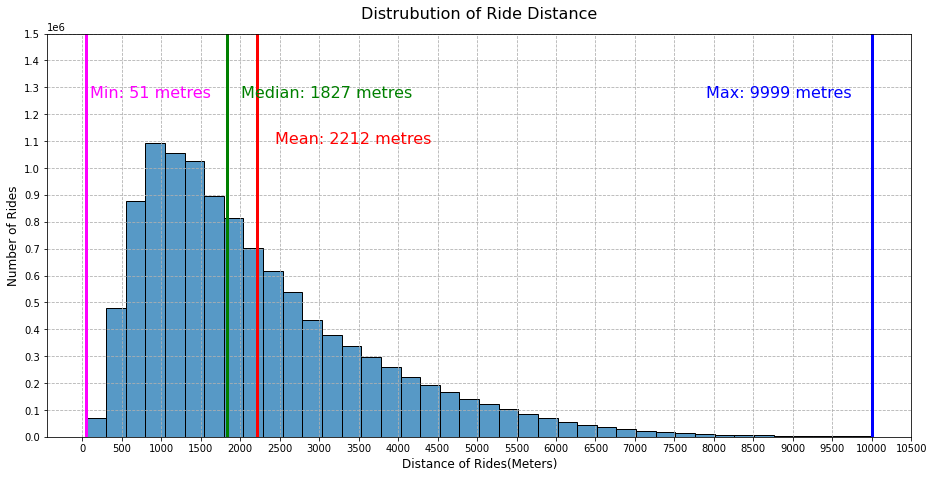

In [12]:
df_distance = df.copy()

fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

distance = df_distance["distance"]
sns.histplot(distance, bins = 40)
ax.grid(zorder=0, linestyle='dashed')

# adding mean and median lines
plt.axvline(distance.mean(), color='red', linestyle='-', linewidth=3 )
plt.axvline(distance.median(), color='green', linestyle='-', linewidth=3 )
plt.axvline(distance.min(), color='magenta', linestyle='-', linewidth=3 )
plt.axvline(distance.max(), color='blue', linestyle='-', linewidth=3 )

# mean, median, min, and max line
min_ylim, max_ylim = plt.ylim()
plt.text(distance.mean()*1.1, max_ylim*0.95, 'Mean: {:.0f} metres'.format(distance.mean()), color = 'red',  fontsize= 16)
plt.text(distance.median()*1.1, max_ylim*1.1, 'Median: {:.0f} metres'.format(distance.median()), color = 'green', fontsize= 16)
plt.text(distance.min()+ 50, max_ylim*1.1, 'Min: {:.0f} metres'.format(distance.min()), color = 'magenta', fontsize= 16)
plt.text(distance.max()-2100, max_ylim*1.1, 'Max: {:.0f} metres'.format(distance.max()), color = 'blue', fontsize= 16)

# plot ticks
ticks =range(0, 11000, 500)
plt.xticks(ticks)
ticks =range(0, 1600000, 100000)
plt.yticks(ticks)

# plot x,y labels
plt.xlabel("Distance of Rides(Meters)", fontsize= 12, x = 0.5)
plt.ylabel("Number of Rides", fontsize= 12)
plt.title('Distrubution of Ride Distance', fontdict={"fontsize":16}, pad = 15);



Interestingly, we can see that mean amount of rides last about 2000 Metres. Maybe if we discover the mean duration of rides, we could find out if people are travelling for work, or is it tourists using the bike for more than 1 hour?

##### Distubution of Ride Duration

What is the mean, median, min, and max distrubution of Ride Duation and what are the trends?

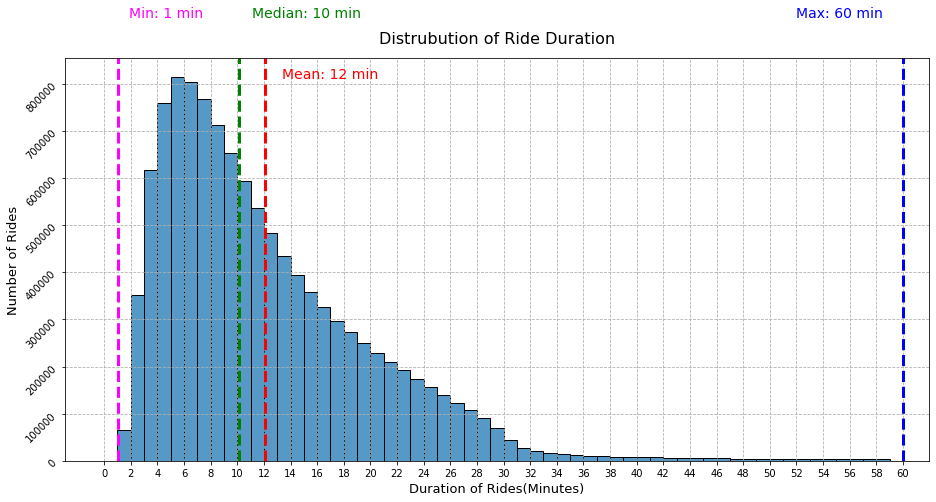

In [13]:
df_duration = df.copy()
    
# Converting seconds to minutes
df_duration["duration"] = df_duration["duration"]/60
    
# Filtering relevant data
duration = df_duration["duration"]
fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.grid(zorder=0, linestyle='dashed')
sns.histplot(duration, bins= range(60))

# adding mean and median lines
plt.axvline(duration.mean(),color='red', linestyle='--', linewidth=3 )
plt.axvline(duration.median(), color='green', linestyle='--', linewidth=3 )
plt.axvline(duration.min(), color='magenta', linestyle='--', linewidth=3 )
plt.axvline(duration.max(), color='blue', linestyle='--', linewidth=3 )

# plot x,y labels
plt.xlabel("Duration of Rides(Minutes)", fontsize= 13, x = 0.5)
plt.ylabel("Number of Rides", fontsize= 13)

# plot mean, median, min, and max lines
min_ylim, max_ylim = plt.ylim()
plt.text(duration.mean()*1.1, max_ylim*0.95, 'Mean: {:.0f} min'.format(duration.mean()), color = 'red',  fontsize= 14)
plt.text(duration.median()*1.1, max_ylim*1.1, 'Median: {:.0f} min'.format(duration.median()), color = 'green', fontsize= 14)
plt.text(duration.min()*1.8, max_ylim*1.1, 'Min: {:.0f} min'.format(duration.min()), color = 'magenta', fontsize= 14)
plt.text(duration.max()-8, max_ylim*1.1, 'Max: {:.0f} min'.format(duration.max()), color = 'blue', fontsize= 14)

# plot ticks
ticks =range(0, 62, 2)
plt.xticks(ticks)
ticks =range(0, 1200000, 100000)
plt.yticks(rotation=45)


plt.title('Distrubution of Ride Duration', fontdict={"fontsize":16}, pad = 15);

We have a mean of 12 Minutes which would indicate that most rides are used to cross the city quickly, where the ride ends. 


This could mean that rides are being used by residents as an alternative form of transport in Summer? Or, for tourists using the bikes to get to further away destinations.

##### Number of rides over time

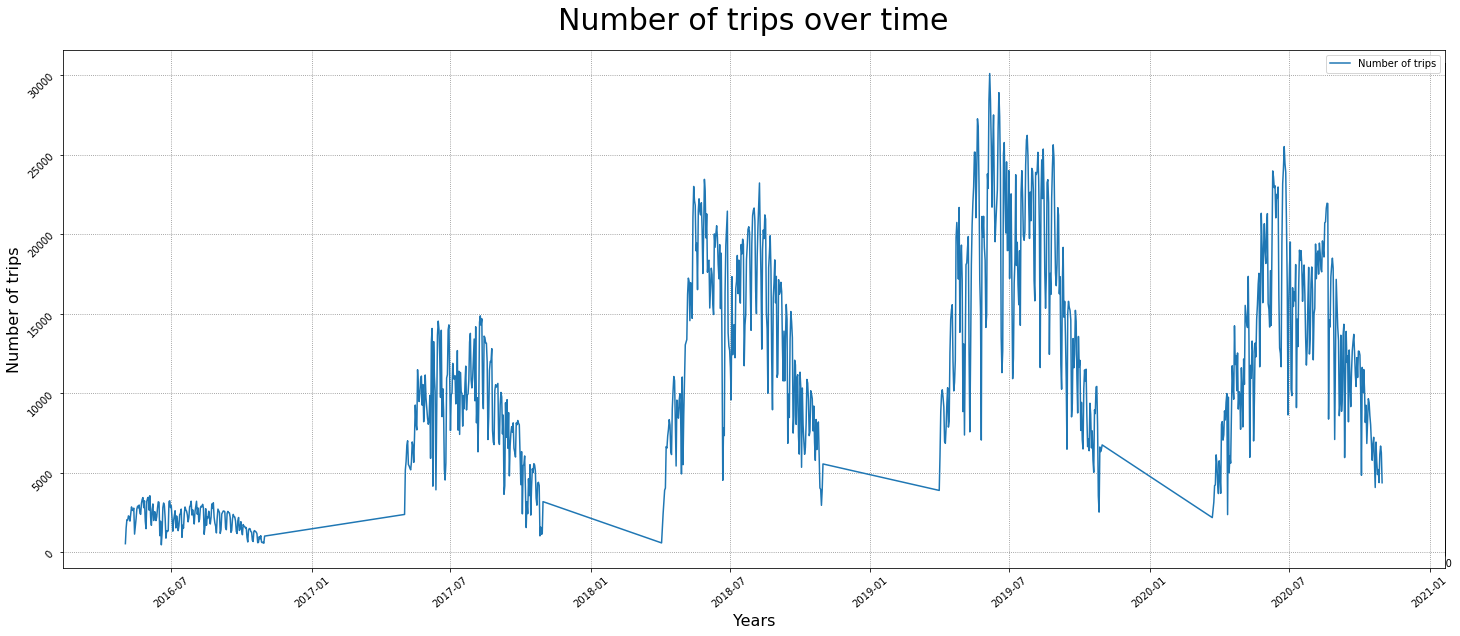

In [14]:
df_time = df.copy()
df_time = df_time.groupby(df_time['departure'].dt.date).size().reset_index(name='count')
# Figure
fig, ax = plt.subplots(figsize=(24,9))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.grid(zorder=0, linestyle='dashed')
sns.lineplot(x = 'departure', y = 'count', data= df_time)

# Labels
ax.set_title("Number of trips over time", fontsize= 30, pad= 20)
ax.set_ylabel("Number of trips", fontsize=16)
ax.set_xlabel("Years", fontsize=16)

# Grid & Legend
plt.grid(linestyle=":", color='grey')
plt.legend(["Number of trips"])
plt.yticks(rotation= 45)
plt.xticks(rotation= 40)

plt.show()

It seems we are missing most of our data between the winter months of the year. But still, it shows the trends increasing every year and always peaking around the summer months of August.

#### Top 10 Departure Stations in 2020

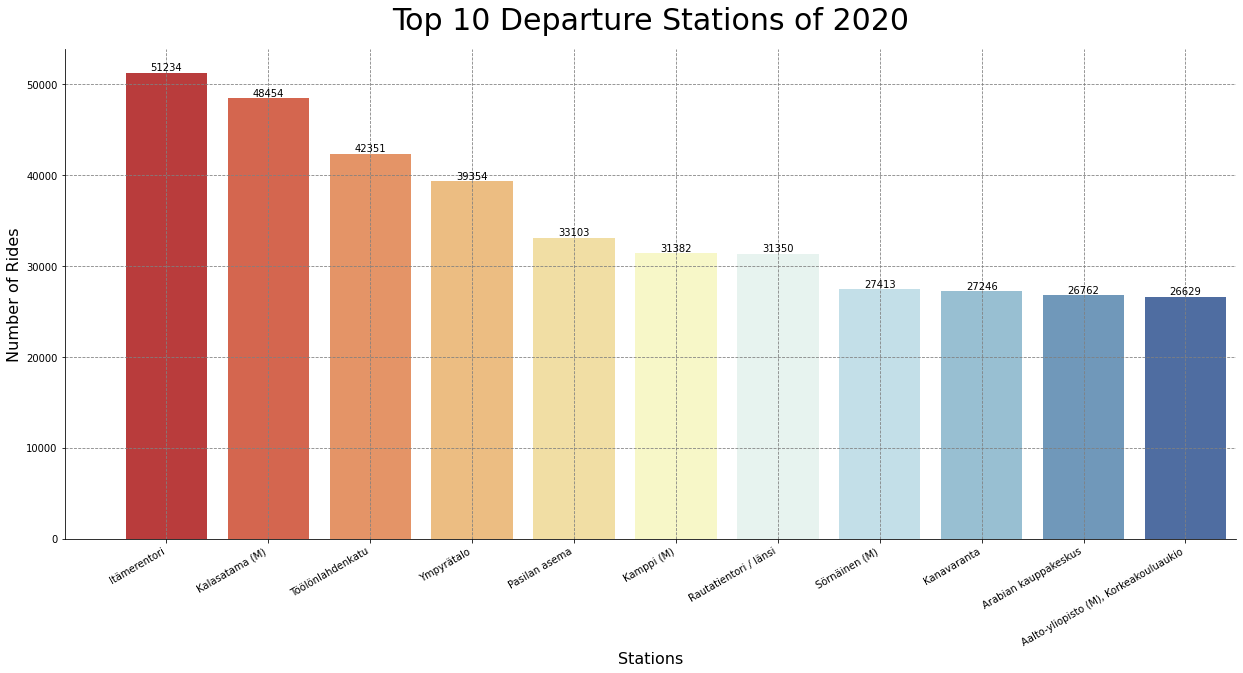

In [15]:
df_departure = df.copy()
departure = df_departure[df_departure['departure'].dt.year == 2020]

# Figure
sequential_colors = sns.color_palette("RdYlBu", 11)
fig = plt.figure(figsize=(21,9))
ax = sns.countplot(x="departure_name", data=departure, 
              order = departure['departure_name'].value_counts().index,
              palette=sequential_colors)
for container in ax.containers:
    ax.bar_label(container)

# Labeling Axes
sns.despine()
plt.xticks(rotation=30, ha="right")
plt.xlabel("Stations", fontsize= 16)
plt.ylabel("Number of Rides", fontsize= 16, x = -100)
plt.xlim(-1,10.5)

# Adding Grid & Title
plt.grid(linestyle="--", color='grey')
ax.set_title("Top 10 Departure Stations of 2020", fontsize= 30, pad= 20)
plt.show()

#### Top 10 Arrival Stations in 2020

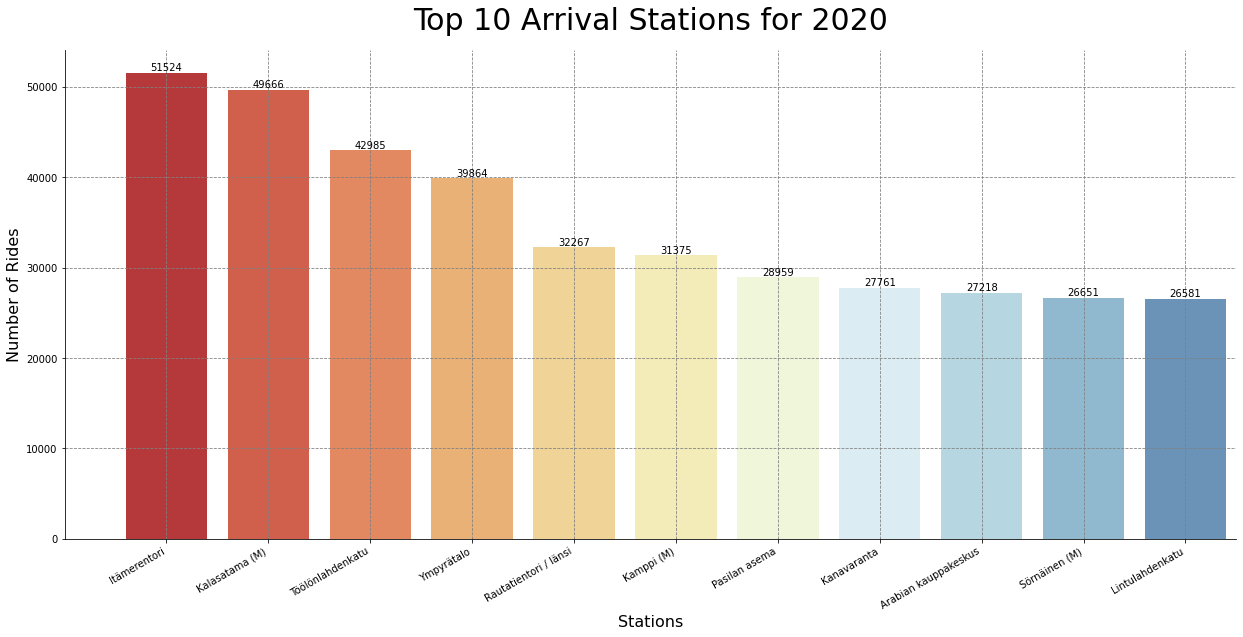

In [16]:
df_arrival = df.copy()
arrival = df_arrival[df_arrival['return'].dt.year == 2020]

# Figure
sequential_colors = sns.color_palette("RdYlBu", 12)
fig = plt.figure(figsize=(21,9))
ax = sns.countplot(x="return_name", data=departure, 
              order = departure['return_name'].value_counts().index,
              palette=sequential_colors)
for container in ax.containers:
    ax.bar_label(container)


# Labeling Axes
sns.despine()
plt.xticks(rotation=30, ha="right")
plt.xlabel("Stations", fontsize= 16)
plt.ylabel("Number of Rides", fontsize= 16, x = -100)
plt.xlim(-1,10.5)


# Adding Grid & Title
plt.grid(linestyle="--", color='grey')
ax.set_title("Top 10 Arrival Stations for 2020", fontsize= 30, pad= 20)
plt.show()

It seems that the first arrival and departure stations are the same which makes sense considering they are the most densly popultated areas around Helsinki. 
From this information, we may consider having more bikes in this area to increase revenue. 

#### Explore Map sections

use taxifare model to import map and revise longitude and latitude.

In [17]:
# import packages
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

In [18]:
# set centre location for Helsinki
center_location = [60.1682, 24.9372]
m = folium.Map(location=center_location, control_scale=True, zoom_start=11)

In [19]:
# find extremes of location data
for col in ["departure_latitude", 
            "departure_longitude", "return_latitude", 
            "return_longitude"]:
    MIN = df[col].min()
    MAX = df[col].max()
    print(col, MIN, MAX)

departure_latitude 60.147921 60.23910894200569
departure_longitude 24.721367 25.10619874297898
return_latitude 60.147921 60.23910894200569
return_longitude 24.721367 25.10619874297898


In [37]:
# add a count to each row 
df["count"] =1
# assign variables to heatmap_data and add to Heatmap
heatmap_data = df.head(1000000)[['departure_latitude', 'departure_longitude', 'count']].groupby(['departure_latitude', 'departure_longitude']).sum().reset_index().values.tolist()
gradient = {0.01: 'blue', 0.1: 'lime', 0.1: 'orange', 1.5: 'red'}
HeatMap(data=heatmap_data, radius=5, 
        gradient=gradient, max_zoom=13, 
        min_opacity= 0.5, max_opacity= 0.8).add_to(m)
m

#### Distubution of rides per hour

In [21]:
def extract_time_features(df):
    '''This function extracts each hour, day, week ,and year
    from the time column
    '''
    time_column = "departure"
    df.index = pd.to_datetime(df[time_column])
    
    df["dow"] = df.index.weekday
    df["hour"] = df.index.hour
    df["month"] = df.index.month
    df["year"] = df.index.year
    return df.reset_index(drop=True)
df = extract_time_features(df)

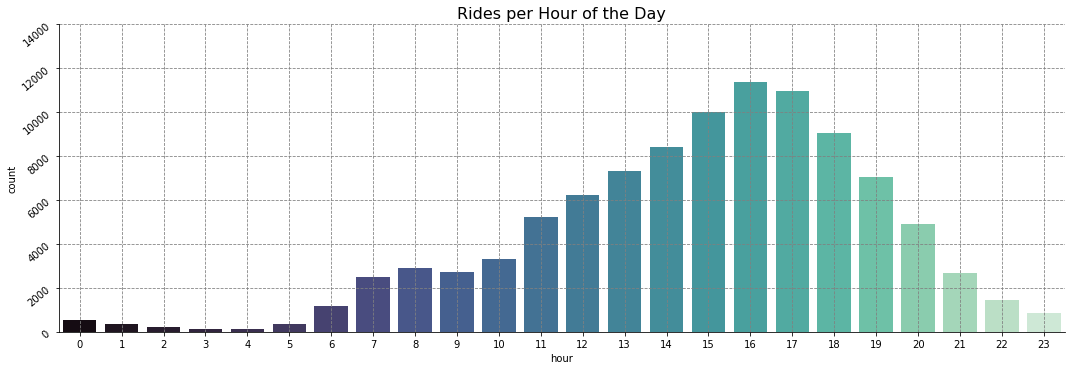

In [22]:
# plotting the catplot for distrubution of rides per hour of the day
sns.catplot(x="hour", kind="count", data=df.head(100000), height=5, aspect=3, palette='mako')

sns.despine()
plt.title('Rides per Hour of the Day', fontsize= 16)
plt.grid(linestyle="--", color='grey')
plt.ylim(0,14000)
plt.yticks(rotation=40)

plt.show()

As expected, the most popular hours are between 13:00 and 19:00. This maybe due to sunlight levels in low winter which I will explore later on in the EDA. This is also true of most cities within Northen Europe. 

#### Hour against Temperature

#### Distubution of rides per day of the week

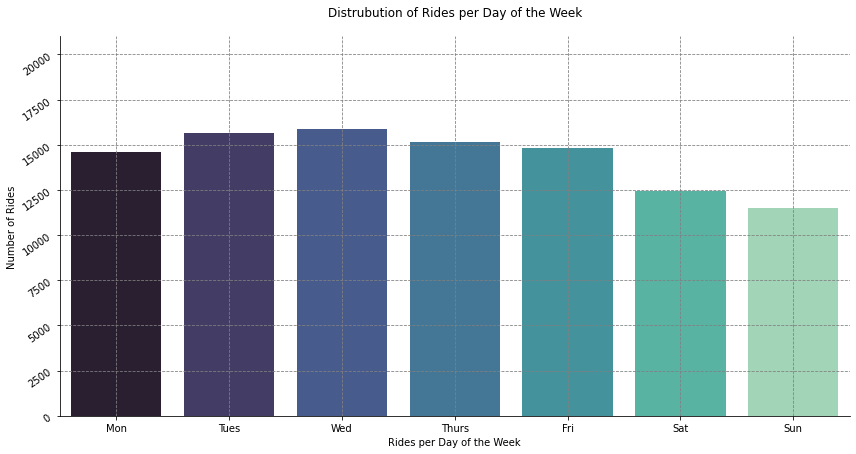

In [23]:
# plotting rideshare per day

dow = sns.catplot(x="dow", kind="count", data=df.sample(100000), 
                 height=6, aspect=2,palette='mako');
sns.despine()
plt.ylim(0,21000)
plt.grid(linestyle="--", color='grey')
plt.xlabel('Rides per Day of the Week')
plt.title('Distrubution of Rides per Day of the Week', pad=20)
plt.ylabel('Number of Rides')
plt.yticks(rotation = 35)
dow.set_xticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])
plt.show()

Unexpectedly, the most popular days for rental are Wednesday and Thursday. Lack of data to explain this.

#### Temperature distribution

In [24]:
temp_df = df.copy()

In [25]:
# rounding down temeratures to an integer
temp_df['temperature'] = temp_df['temperature'].apply(np.floor)

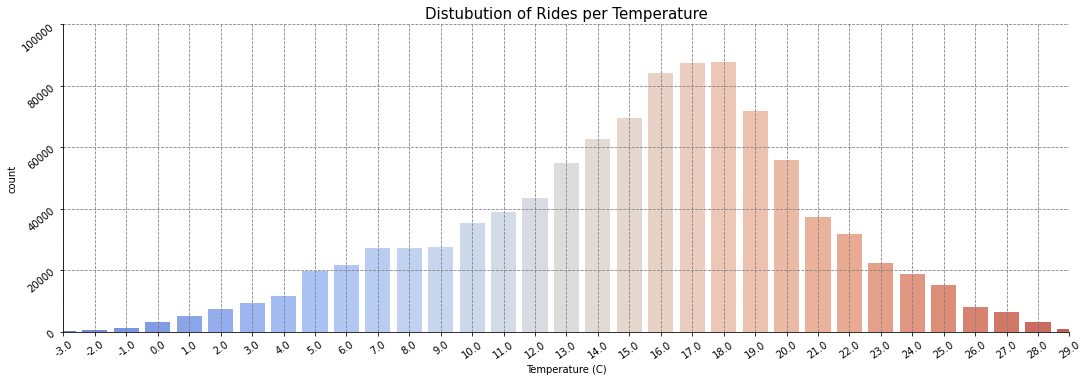

In [26]:
# plotting the catplot for distrubution of rides per temperature
sns.catplot(x="temperature", kind="count", data=temp_df.sample(1000000) 
            ,height=5, aspect=3, palette="coolwarm");

plt.title('Distubution of Rides per Temperature',fontsize= 15)
plt.grid(linestyle="--", color='grey')
plt.ylim(0,100000)
plt.xlim(3,35)
plt.yticks(rotation=40)
plt.xticks(rotation=35)
plt.xlabel('Temperature (C)')

plt.show()

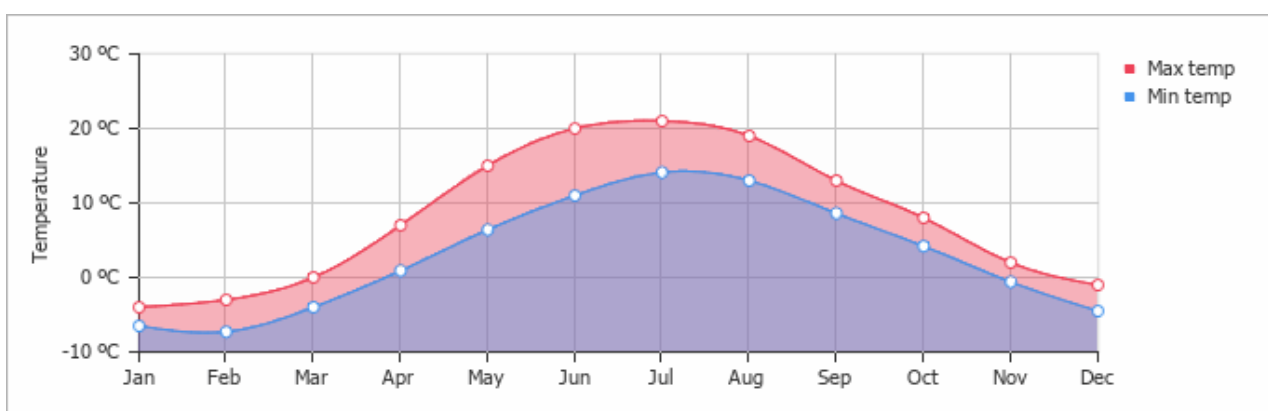

In [27]:
from IPython.display import display, Image
display(Image(filename='helsinkitempavg.png'))

As expected, the most rides taken in Helsinki is around 18C in summer.

In [28]:
temp_df = extract_time_features(temp_df)

In [29]:
temp_df.sample(10)

,departure,return,departure_id,departure_name,return_id,return_name,distance,duration,speed,departure_latitude,departure_longitude,return_latitude,return_longitude,temperature,count,dow,hour,month,year
1584927,2020-07-18 16:55:38,2020-07-18 17:18:52,73,Kesäkatu,14.0,Senaatintori,3618.000,1391.000,0.156,60.179,24.913,60.169,24.953,23.000,1,5,16,7,2020
4705382,2019-07-11 10:09:19,2019-07-11 10:19:39,148,Juhana Herttuan tie,232.0,Oulunkylän asema,1308.000,615.000,0.128,60.218,24.966,60.229,24.967,13.000,1,3,10,7,2019
4407881,2019-06-25 19:34:13,2019-06-25 19:37:00,115,Venttiilikuja,114.0,Ratapihantie,469.000,162.000,0.174,60.194,24.942,60.196,24.936,19.000,1,1,19,6,2019
6736640,2018-05-07 14:24:00,2018-05-07 14:34:00,76.0,Olympiastadion,22.0,Rautatientori / länsi,1903.000,555.000,0.206,60.185,24.925,60.171,24.940,13.000,1,0,14,5,2018
1292509,2020-06-29 15:52:01,2020-06-29 16:11:41,21,Töölönlahdenkatu,1.0,Kaivopuisto,4017.000,1177.000,0.205,60.172,24.939,60.155,24.950,19.000,1,0,15,6,2020
9575374,2016-07-26 18:54:00,2016-07-26 19:14:00,B07,Brahen kenttä,A40,Lastenlehto,3883.000,1201.000,0.194,60.187,24.951,60.166,24.927,21.000,1,1,18,7,2016
2067504,2020-08-16 17:22:23,2020-08-16 17:31:01,81,Stenbäckinkatu,91.0,Seurasaari,2069.000,517.000,0.240,60.188,24.912,60.188,24.885,25.000,1,6,17,8,2020
5395048,2019-08-12 20:14:04,2019-08-12 20:37:14,74,Rajasaarentie,64.0,Tyynenmerenkatu,4820.000,1389.000,0.208,60.183,24.911,60.157,24.921,17.000,1,0,20,8,2019
8827394,2018-09-04 16:52:00,2018-09-04 16:57:00,621.0,Hauenkalliontie,625.0,Suomenlahdentie,912.000,312.000,0.175,60.161,24.756,60.160,24.741,17.000,1,1,16,9,2018
2876885,2020-10-24 17:52:28,2020-10-24 18:06:48,202,Merihaka,27.0,Eerikinkatu,2352.000,855.000,0.165,60.178,24.958,60.167,24.936,5.000,1,5,17,10,2020


In [30]:
df['month'].value_counts()

8     2131190
6     2107976
7     2000469
5     1848434
9     1425617
10     873373
4      827334
3       36232
Name: month, dtype: int64

NameError: name '_xticklabels' is not defined

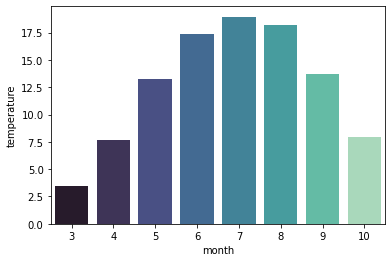

<Figure size 1512x648 with 0 Axes>

In [31]:
sns.barplot(x='month', y= "temperature", data=temp_df.sample(100000),ci= 0.8, palette='mako');
plt.figure(figsize=(21,9))
_xticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])

#### Heatmap of departures per hour 

This map shows every pick up point per hour of the day in 2020

In [ ]:
heatmap_data_by_hour = []
__df__ = df.head(100000)
for hour in df.hour.sort_values().unique():
    _df = __df__[__df__.hour == hour][['departure_latitude', 
                                       'departure_longitude',
                                       'count']].groupby(['departure_latitude',
                                                          'departure_longitude']).sum().reset_index().values.tolist()
    heatmap_data_by_hour.append(_df)

In [ ]:
m2 = folium.Map(location=center_location, control_scale=True, zoom_start=11)
HeatMapWithTime(heatmap_data_by_hour, radius=5,
                gradient=gradient,auto_play=True,
                min_opacity=0.5, max_opacity=0.8,
                use_local_extrema=False).add_to(m2)
m2

## Conclusion

That is the end of the exploration so far. It was fun to work with this database and we extracted some useful insights for further growth. Some of the data was quite limited within the 5 years regarding the weather data. I would like to add some more detailed data including windspeed or feels like temperature to then predict possible totals of rides per day in the future.

Further on, I would like to create a pipeline that processes the weather on that day to predict how many rides will be taken based on the weather forecast. 

This may help to predict where and when more bikes should be located and what days maintainance would impact the overall bikes in circulation. 